<a href="https://colab.research.google.com/github/emma-alv/ping_statistics/blob/master/Ping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/emma-alv/ping_statistics

Cloning into 'ping_statistics'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 36 (delta 12), reused 30 (delta 9), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [3]:
%cd ping_statistics/

/content/ping_statistics


In [0]:
!git config --global user.name 'Emmanuel Rodriguez'
!git config --global user.email 'ing.erodrigueza@gmail.com'

In [5]:
!git pull origin version_2

From https://github.com/emma-alv/ping_statistics
 * branch            version_2  -> FETCH_HEAD
Updating 93c1d87..b7c5df1
Fast-forward
 .gitignore         |   6 ++-
 google_ie          | 105 +++++++++++++++++++++++++++++++++++++++++++++++++++++
 google_in          | 105 +++++++++++++++++++++++++++++++++++++++++++++++++++++
 google_mx          | 105 +++++++++++++++++++++++++++++++++++++++++++++++++++++
 google_uk          | 105 +++++++++++++++++++++++++++++++++++++++++++++++++++++
 google_usa         | 105 +++++++++++++++++++++++++++++++++++++++++++++++++++++
 ms.awk             |   9 -----
 ping_statistics.py |  58 +++++++++++++++++++++++++++++
 ping_stats.sh      |  33 ++++-------------
 time_ping.awk      |  36 ------------------
 10 files changed, 595 insertions(+), 72 deletions(-)
 create mode 100644 google_ie
 create mode 100644 google_in
 create mode 100644 google_mx
 create mode 100644 google_uk
 create mode 100644 google_usa
 delete mode 100644 ms.awk
 create mode 100644 ping_st

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
listFiles = [i for i in os.listdir('.') if "google" in i]
listFiles

['google_in', 'google_mx', 'google_usa', 'google_ie', 'google_uk']

In [10]:
for i in listFiles:
    with open(i) as data:
        vars()["uc_"+i] = data.readlines()
        print(vars()["uc_"+i])

['PING google.in (172.217.18.164): 56 data bytes\n', '64 bytes from 172.217.18.164: icmp_seq=0 ttl=47 time=45.052 ms\n', '64 bytes from 172.217.18.164: icmp_seq=1 ttl=47 time=33.585 ms\n', '64 bytes from 172.217.18.164: icmp_seq=2 ttl=47 time=39.092 ms\n', '64 bytes from 172.217.18.164: icmp_seq=3 ttl=47 time=35.379 ms\n', '64 bytes from 172.217.18.164: icmp_seq=4 ttl=47 time=35.771 ms\n', '64 bytes from 172.217.18.164: icmp_seq=5 ttl=47 time=51.089 ms\n', '64 bytes from 172.217.18.164: icmp_seq=6 ttl=47 time=72.135 ms\n', '64 bytes from 172.217.18.164: icmp_seq=7 ttl=47 time=37.525 ms\n', '64 bytes from 172.217.18.164: icmp_seq=8 ttl=47 time=38.065 ms\n', '64 bytes from 172.217.18.164: icmp_seq=9 ttl=47 time=88.791 ms\n', '64 bytes from 172.217.18.164: icmp_seq=10 ttl=47 time=49.974 ms\n', '64 bytes from 172.217.18.164: icmp_seq=11 ttl=47 time=40.156 ms\n', '64 bytes from 172.217.18.164: icmp_seq=12 ttl=47 time=35.104 ms\n', '64 bytes from 172.217.18.164: icmp_seq=13 ttl=47 time=40.74

In [0]:
def _clean_data_(current_list):

    clean_data = []
    time = []

    for i in current_list:
        if "time=" in i:
            clean_data.append(i.split())

    for i in clean_data:
        time.append(float(i[6].replace("time=", "")))

    return time

In [12]:
for i in listFiles:
    vars()[i] = _clean_data_(vars()["uc_"+i])
    print(vars()[i])

[45.052, 33.585, 39.092, 35.379, 35.771, 51.089, 72.135, 37.525, 38.065, 88.791, 49.974, 40.156, 35.104, 40.749, 39.144, 45.839, 33.987, 43.158, 36.069, 40.804, 71.97, 35.099, 38.436, 40.059, 35.824, 33.857, 44.636, 37.169, 39.227, 33.492, 37.999, 33.426, 36.153, 34.59, 33.844, 33.608, 34.931, 47.288, 37.274, 43.071, 44.886, 34.594, 36.425, 35.092, 51.944, 44.163, 37.135, 50.459, 33.713, 33.902, 42.943, 33.411, 34.061, 36.909, 36.835, 38.511, 34.388, 40.324, 39.499, 47.142, 38.913, 81.164, 46.11, 130.464, 34.768, 37.98, 33.385, 39.261, 34.662, 35.449, 39.788, 33.807, 44.52, 39.519, 35.577, 36.112, 60.165, 38.337, 34.666, 56.915, 77.589, 38.686, 34.187, 34.35, 34.337, 38.222, 34.114, 35.173, 37.793, 40.211, 44.632, 34.236, 39.513, 44.759, 34.793, 36.331, 34.48, 33.928, 36.521, 34.521]
[65.572, 36.777, 42.065, 33.758, 33.815, 33.906, 35.62, 35.918, 33.697, 33.865, 41.31, 39.4, 39.227, 34.088, 50.113, 37.65, 34.02, 34.763, 34.234, 39.115, 34.887, 52.973, 34.664, 38.863, 33.971, 33.923, 33

In [0]:
def _extend_data_(list_extend):

    while len(list_extend) < 100:
        list_extend.append(0)

    return list_extend

In [13]:
for i in listFiles:
    vars()[i] = _extend_data_(vars()[i])
    print(vars()[i])

[45.052, 33.585, 39.092, 35.379, 35.771, 51.089, 72.135, 37.525, 38.065, 88.791, 49.974, 40.156, 35.104, 40.749, 39.144, 45.839, 33.987, 43.158, 36.069, 40.804, 71.97, 35.099, 38.436, 40.059, 35.824, 33.857, 44.636, 37.169, 39.227, 33.492, 37.999, 33.426, 36.153, 34.59, 33.844, 33.608, 34.931, 47.288, 37.274, 43.071, 44.886, 34.594, 36.425, 35.092, 51.944, 44.163, 37.135, 50.459, 33.713, 33.902, 42.943, 33.411, 34.061, 36.909, 36.835, 38.511, 34.388, 40.324, 39.499, 47.142, 38.913, 81.164, 46.11, 130.464, 34.768, 37.98, 33.385, 39.261, 34.662, 35.449, 39.788, 33.807, 44.52, 39.519, 35.577, 36.112, 60.165, 38.337, 34.666, 56.915, 77.589, 38.686, 34.187, 34.35, 34.337, 38.222, 34.114, 35.173, 37.793, 40.211, 44.632, 34.236, 39.513, 44.759, 34.793, 36.331, 34.48, 33.928, 36.521, 34.521]
[65.572, 36.777, 42.065, 33.758, 33.815, 33.906, 35.62, 35.918, 33.697, 33.865, 41.31, 39.4, 39.227, 34.088, 50.113, 37.65, 34.02, 34.763, 34.234, 39.115, 34.887, 52.973, 34.664, 38.863, 33.971, 33.923, 33

In [0]:
d = {}

In [14]:
for i in listFiles:
    d.update({i : vars()[i]})

df = pd.DataFrame(d)
df

,google_in,google_mx,google_usa,google_ie,google_uk
0,45.052,65.572,35.110,41.503,33.416
1,33.585,36.777,34.280,35.477,36.307
2,39.092,42.065,47.308,36.613,46.344
3,35.379,33.758,34.064,35.077,41.392
4,35.771,33.815,33.449,35.024,35.828
5,51.089,33.906,33.809,35.040,33.276
6,72.135,35.620,34.719,58.200,34.443
7,37.525,35.918,41.386,33.824,33.967
8,38.065,33.697,36.289,56.815,34.989
9,88.791,33.865,34.030,34.217,36.957


In [15]:
df_means = pd.DataFrame(df.mean(axis=0))
df_results = df_means.transpose()
df_results = df_results.append(df.std(axis=0), ignore_index=True)
df_results = df_results.append(df.var(axis=0), ignore_index=True)
df_results.rename({0:'Average',1:'Standard deviation',2:'Variance'}, inplace=True)

df_results

,google_in,google_mx,google_usa,google_ie,google_uk
Average,41.596950,41.502260,35.240450,44.524280,39.190670
Standard deviation,13.619088,17.619647,4.586868,17.670520,12.466738
Variance,185.479561,310.451946,21.039358,312.247262,155.419549


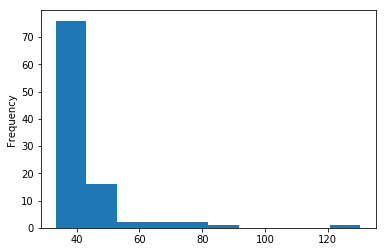

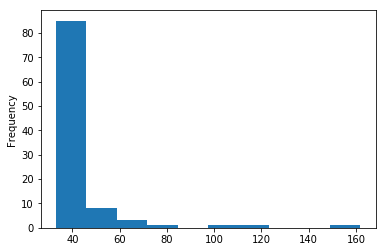

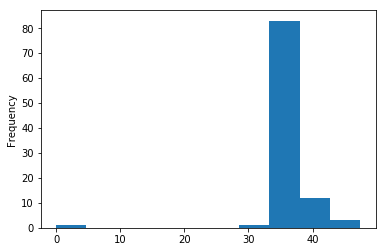

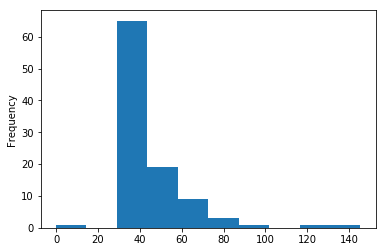

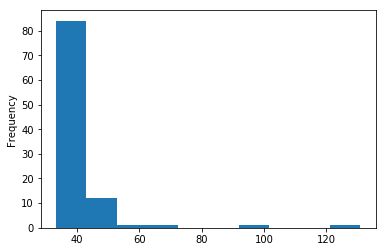

<Figure size 432x288 with 0 Axes>

In [16]:
for i in listFiles:
  df_plt = df[i].plot.hist(x = i)
  plt.show()

In [0]:
for i in listFiles:
    df_plt = df[i].plot(kind='hist', x=i)
    plt.savefig(i + '.png')
    plt.close()

In [0]:
!rm *.png

rm: cannot remove '*.png': No such file or directory


In [18]:
!git status

On branch master
Your branch is ahead of 'origin/master' by 7 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


On branch master
Your branch is ahead of 'origin/master' by 7 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean
